In [18]:
import numpy as np
import sys
import os
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))

import eleganplot as ep


/var/folders/mc/nvqwydjj7b59cknzysq6s3mr0000gn/T/ipykernel_61189/636970099.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


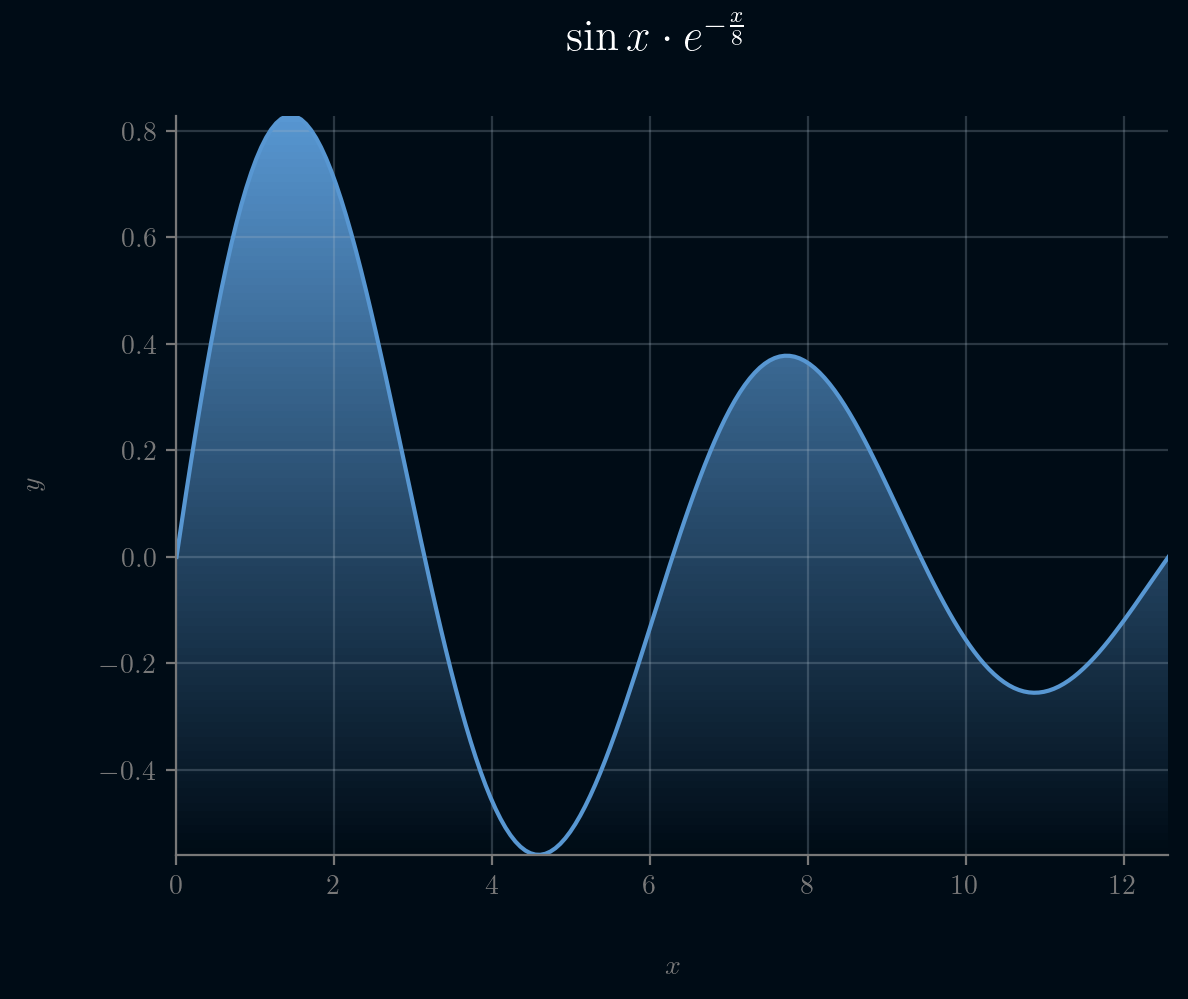

In [19]:
import eleganplot as eplt
import numpy as np




# Простое использование готового метода
fig, ax = eplt.subplots(dpi=200)
fig
x = np.linspace(0, 4*np.pi, 200)
y = np.sin(x) * np.exp(-x/8)

# Новый gradient_plot метод
ax.gradient_plot(x, y, alpha_coef=1, color="#5897d2")
fig.suptitle(r"$\sin x \cdot e^{- \frac{x}{8}}$", fontsize=16, color='w')
# fig.title = "Gradient fill plot"
ax.set_xlabel('$x$', labelpad=20)
ax.set_ylabel('$y$', labelpad=20)
fig.show()
fig.savefig("Simple.png")

/var/folders/mc/nvqwydjj7b59cknzysq6s3mr0000gn/T/ipykernel_61189/1210283388.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


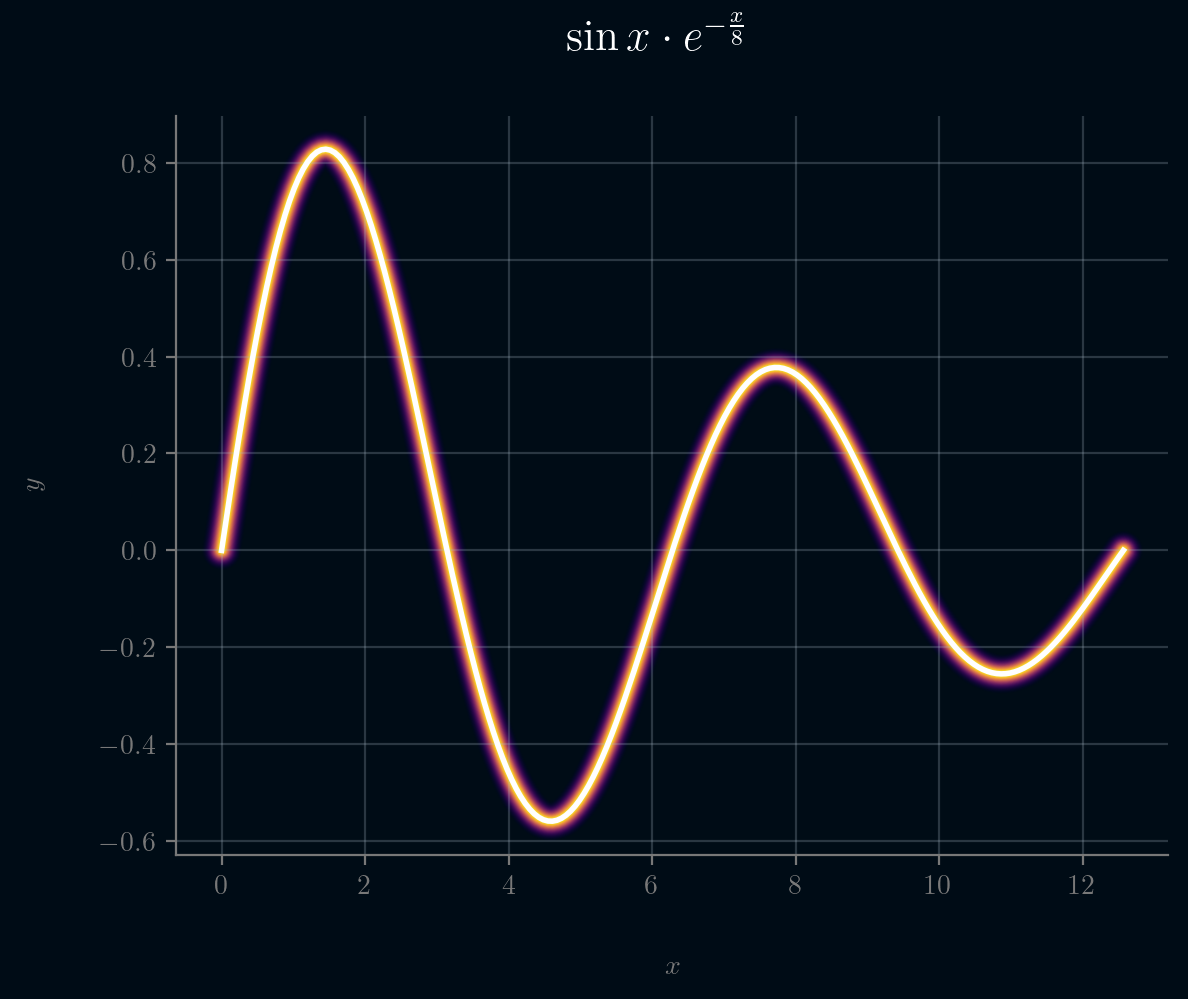

In [7]:
import eleganplot as eplt
from eleganplot.utils import get_decay_functions
import numpy as np

decay_funcs = get_decay_functions()
exponential_decay = decay_funcs['exponential']

# Простое использование готового метода
fig, ax = eplt.subplots(dpi=200)
x = np.linspace(0, 4*np.pi, 200)
y = np.sin(x) * np.exp(-x/8)

# Новый glow_line метод
ax.glow_line(
    x, y,
    color="w",
    linewidth=2,
    glow_color='orange',
    colormap='plasma',
    glow_width=6.0,
    glow_alpha=0.7,
    glow_layers=20,
    decay_function=exponential_decay,
)
fig.suptitle(r"$\sin x \cdot e^{- \frac{x}{8}}$", fontsize=16, color='w')
ax.set_xlabel('$x$', labelpad=20)
ax.set_ylabel('$y$', labelpad=20)
fig.show()
fig.savefig("Glow.png")

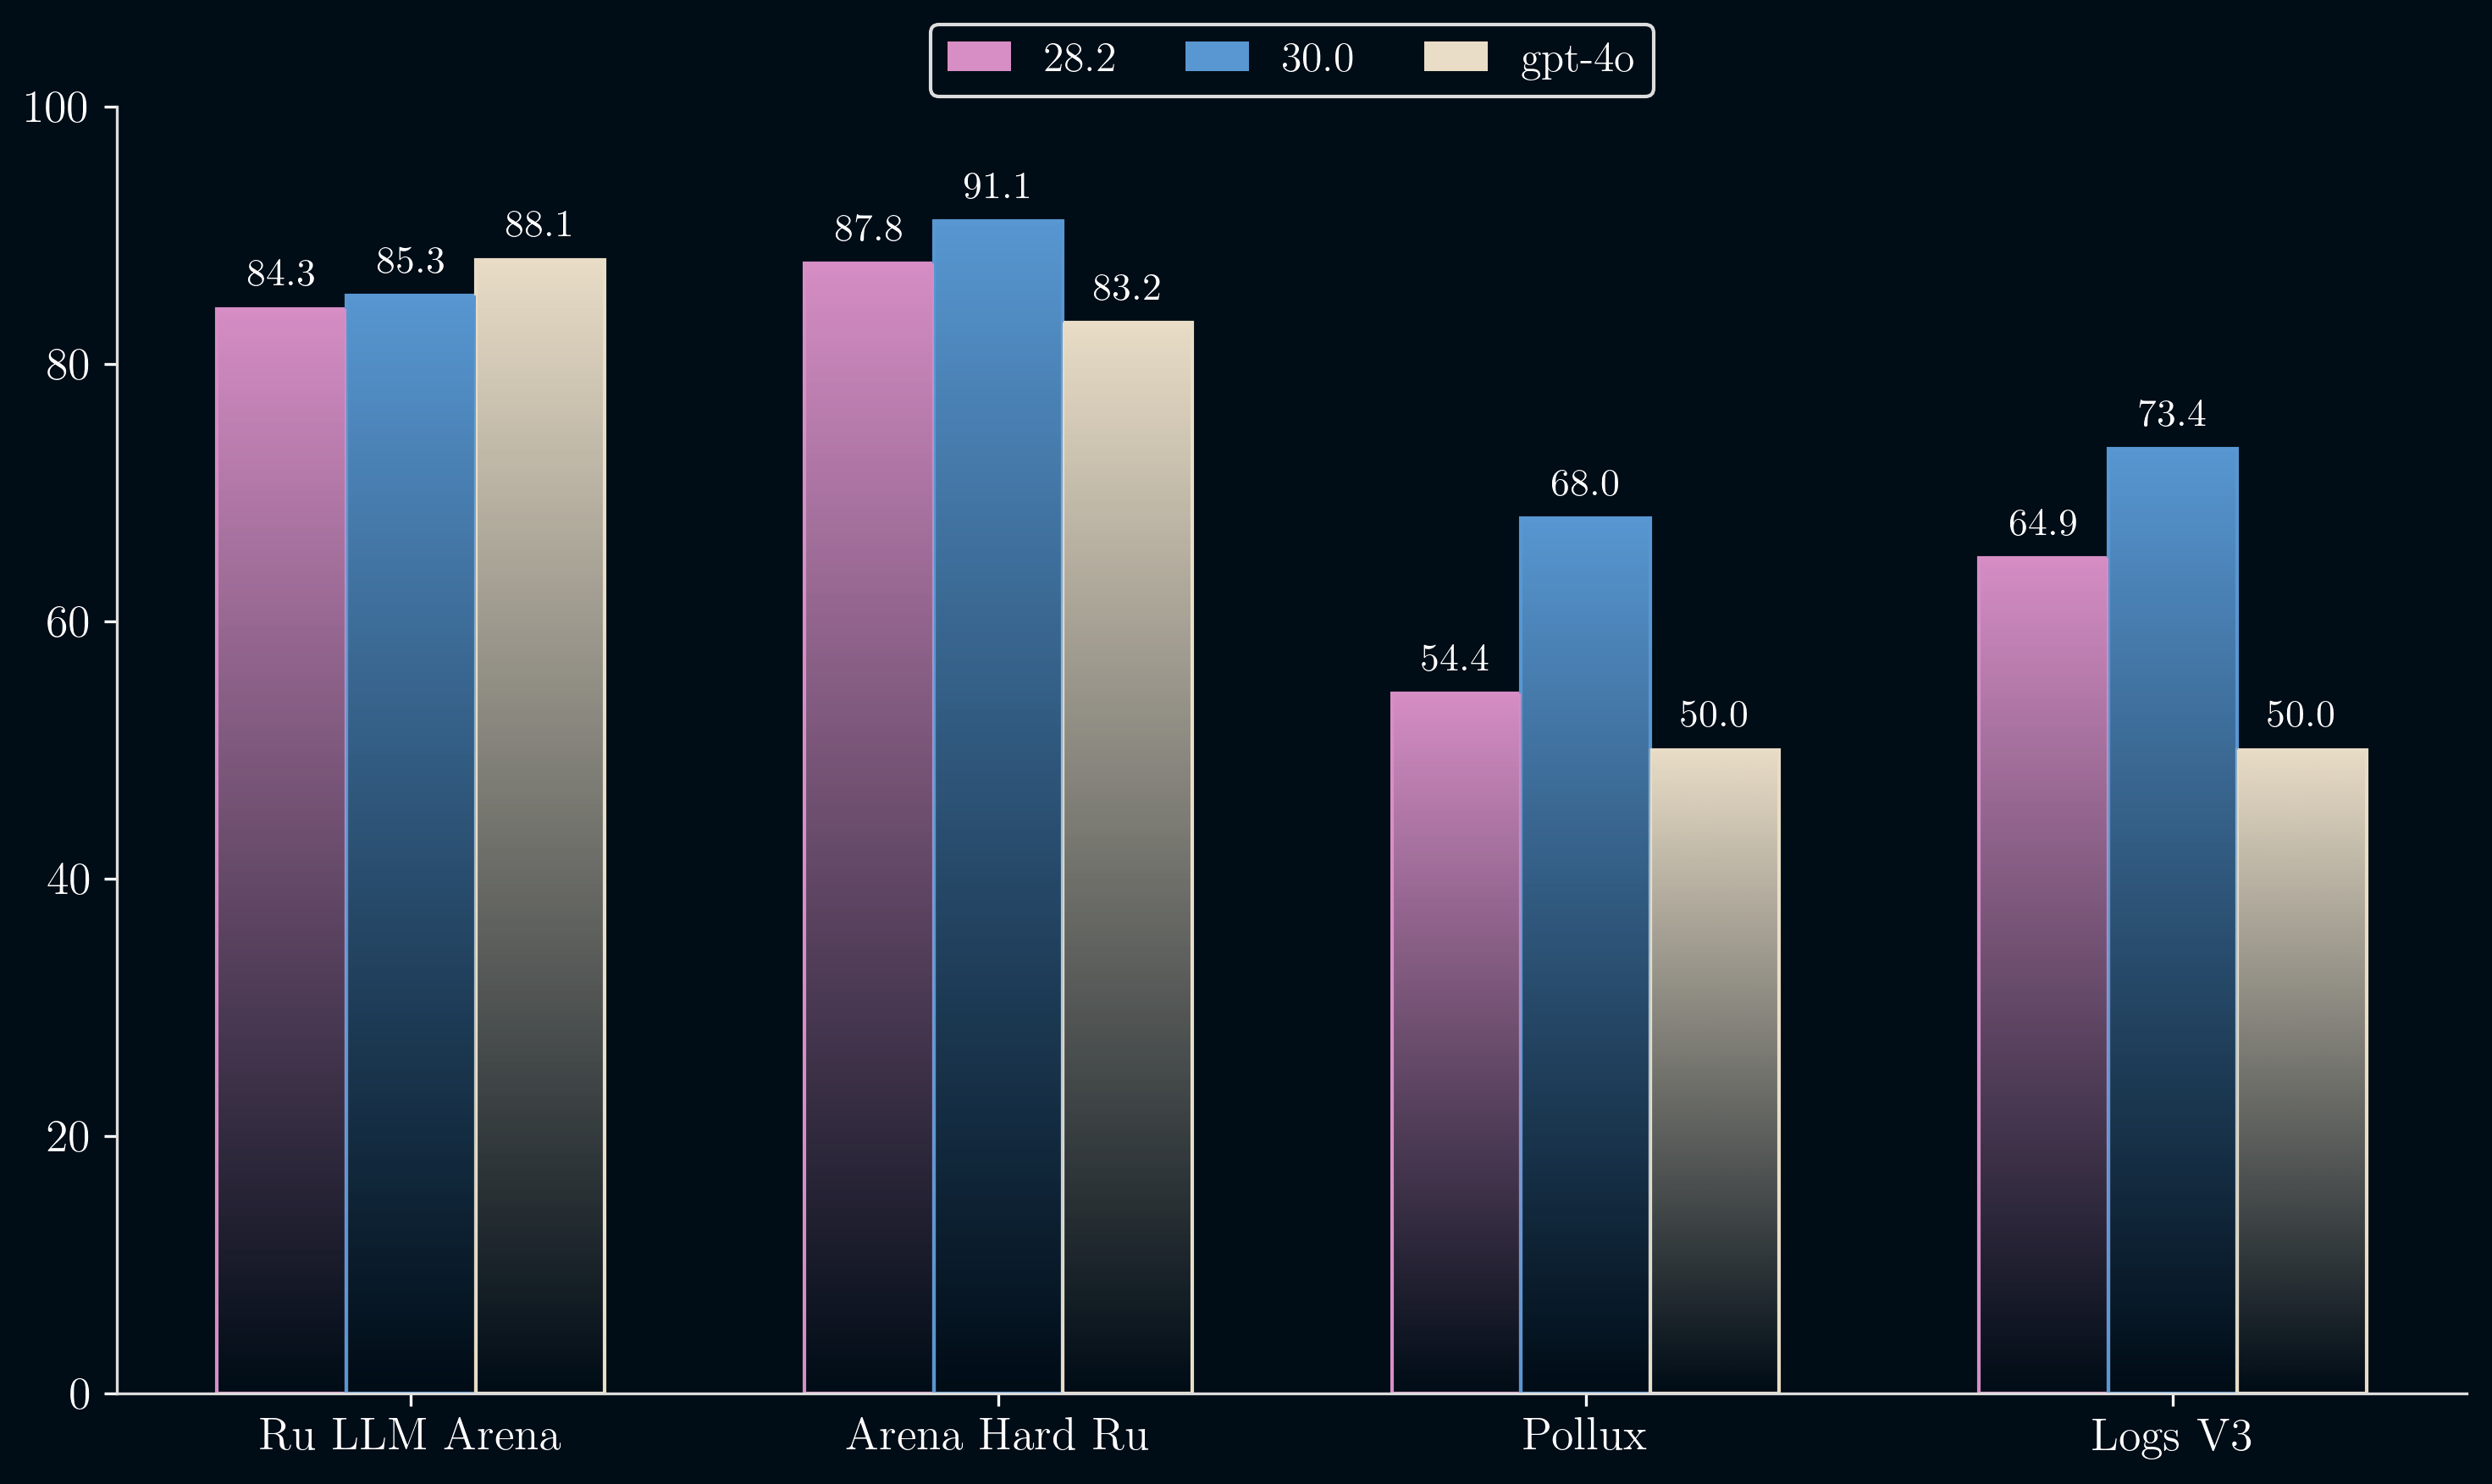

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import pandas as pd
from matplotlib.colors import to_rgba
import matplotlib.colors as mcolors
# -----------------------------
# Данные
# -----------------------------
data = [
    # RU LLM Arena
    {"model_tier": "Max",  "version": "28.2", "benchmark": "Ru LLM Arena", "score": 84.3},
    {"model_tier": "Max",  "version": "30.0", "benchmark": "Ru LLM Arena", "score": 85.3},

    # Arena Hard Ru
    {"model_tier": "Max",  "version": "28.2", "benchmark": "Arena Hard Ru", "score": 87.8},
    {"model_tier": "Max",  "version": "30.0", "benchmark": "Arena Hard Ru", "score": 91.1},

    # Pollux
    {"model_tier": "Max",  "version": "28.2", "benchmark": "Pollux", "score": 54.4},
    {"model_tier": "Max",  "version": "30.0", "benchmark": "Pollux", "score": 68.0},

    # Logs V3
    {"model_tier": "Max",  "version": "28.2", "benchmark": "Logs V3", "score": 64.9},
    {"model_tier": "Max",  "version": "30.0", "benchmark": "Logs V3", "score": 73.4},
]

df_base = pd.DataFrame(data)

data_gpt4o = [
    {"model_tier": "GPT-4o", "version": "gpt-4o", "benchmark": "Ru LLM Arena", "score": 88.1},
    {"model_tier": "GPT-4o", "version": "gpt-4o", "benchmark": "Arena Hard Ru", "score": 83.2},
    {"model_tier": "GPT-4o", "version": "gpt-4o", "benchmark": "Pollux", "score": 50.0},
    {"model_tier": "GPT-4o", "version": "gpt-4o", "benchmark": "Logs V3", "score": 50.0},
]

df_gpt4o = pd.DataFrame(data_gpt4o)

df = pd.concat([df_base, df_gpt4o], ignore_index=True)

# -----------------------------
# Подготовка матрицы
# -----------------------------
categories = df["benchmark"].unique().tolist()
models = df["version"].unique().tolist()

values = np.zeros((len(categories), len(models)))
for i, cat in enumerate(categories):
    for j, mod in enumerate(models):
        row = df[(df["benchmark"] == cat) & (df["version"] == mod)]
        if not row.empty:
            values[i, j] = row["score"].values[0]

# -----------------------------
# Стилизация
# -----------------------------
plt.rcParams.update({
    "axes.edgecolor": "#DDDDDD",
    # "axes.linewidth": 1.0,
    # "axes.grid": True,
    # "grid.color": "#E6E6E6",
    "grid.linewidth": 0,
    # "grid.alpha": 1.0,
    "axes.axisbelow": True,
    "font.size": 13,
    "xtick.color": 'w',
    "ytick.color": 'w',
    "text.color": 'w',
})

# Градиенты для моделей
gradients = [
    ("#ffd2c6", "#D68EC5"),   # 28.2 (красный)
    ("#c9d4ff", "#5897D2"),   # 30.0 (синий)
    ("#f0ede5", "#E9DDC7"),   # GPT-4o (бежевый)
]

# gradients = [
#     ("#ffd2c6", "w"),   # 28.2 (красный)
#     ("#c9d4ff", "blue"),   # 30.0 (синий)
#     ("#f0ede5", "red"),   # GPT-4o (бежевый)
# ]


n_cat = len(categories)
n_models = len(models)

fig, ax = plt.subplots(figsize=(10, 6), dpi=300)

index = np.arange(n_cat)
bar_width = 0.22
offsets = (np.arange(n_models) - (n_models-1)/2) * bar_width

# helper для градиента
def gradient_bar(ax, x, height, width, c_bottom, c_top, zorder=2):
    bar = ax.bar(x, height, width, color=(0,0,0,0), edgecolor=c_top, zorder=zorder)
    N = 256
    c1 = np.array(to_rgba(c_bottom))
    c2 = np.array(to_rgba(c_top))
    grad = np.zeros((N, 1, 4))
    for i in range(N):
        t = i/(N-1)
        grad[i, 0, :] = (1-t)*c1 + t*c2
    left = bar[0].get_x()
    right = left + width
    gradient = np.empty((N, 1, 4), dtype=float)
    rgb = mcolors.to_rgb(c_top)
    
    # Устанавливаем RGB компоненты
    gradient[:, :, :3] = rgb
    # Создаём линейный градиент альфа-канала
    gradient[:, :, 3] = np.linspace(0, 1, 256)[:, None]
    im = ax.imshow(
        gradient, extent=[left, right, 0, height], origin="lower",
        aspect="auto", zorder=zorder+0.1
    )
    im.set_clip_path(bar[0])
    return bar[0]

# Рисуем бары
for m in range(n_models):
    xs = index + offsets[m]
    ys = values[:, m]
    c_bottom, c_top = gradients[m]
    for x, h in zip(xs, ys):
        gradient_bar(ax, x, h, bar_width, c_bottom, c_top, zorder=2.5)
    ax.bar(xs, ys, bar_width, fill=False,
           edgecolor="None", linewidth=0.8, zorder=3.0)

# Оформление осей
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 20))
ax.set_xlim(-0.5, n_cat-0.5)
ax.set_xticks(index)
ax.set_xticklabels(categories, linespacing=1.2, rotation=0)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Подписи над барами
for m in range(n_models):
    for x, y in zip(index + offsets[m], values[:, m]):
        ax.text(x, y + 1.2, f"{y:.1f}", ha="center", va="bottom", fontsize=11)

# Легенда
legend_handles = [
    mpatches.Patch(facecolor=gradients[m][1], edgecolor="none", label=models[m])
    for m in range(n_models)
]
leg = ax.legend(
    handles=legend_handles,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.08),
    ncol=n_models,
    frameon=True,
    fontsize=12,
    handlelength=1.5,
    columnspacing=1.6,
)
leg.get_frame().set_edgecolor("#DDDDDD")
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_alpha(1.0)

fig.savefig("gradien_bar.png")

plt.tight_layout()
plt.show()


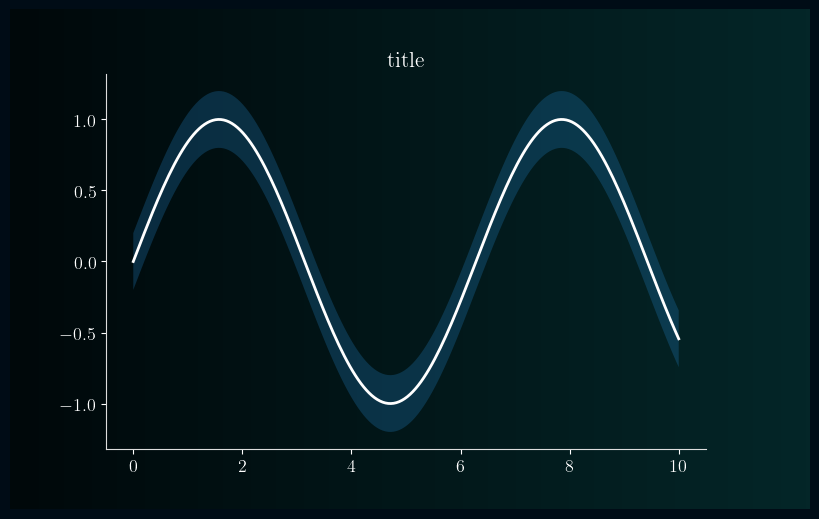

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

fig = plt.figure(figsize=(8,5))

# --- Фоновая ось (вся фигура) с градиентом ---
ax_bg = fig.add_axes([0, 0, 1, 1], zorder=0)
ax_bg.axis('off')

nx = 512
grad = np.linspace(0, 1, nx)
grad = np.tile(grad, (64, 1))   # 2D полотно
cmap = LinearSegmentedColormap.from_list("g", ["#00080a", "#042628"])
ax_bg.imshow(grad, aspect='auto', cmap=cmap, extent=[0,1,0,1], transform=fig.transFigure)

# --- Основная ось поверх, с прозрачным фоном ---
ax = fig.add_axes([0.12, 0.12, 0.75, 0.75], zorder=1, facecolor='none')  # facecolor='none'
# Альтернатива: ax.set_facecolor('none') или ax.patch.set_alpha(0)

x = np.linspace(0, 10, 200)
ax.plot(x, np.sin(x), color='white', lw=2)
ax.fill_between(x, np.sin(x)-0.2, np.sin(x)+0.2, alpha=0.3)  # полупрозрачная заливка
ax.set_title("title", color='white')

plt.show()


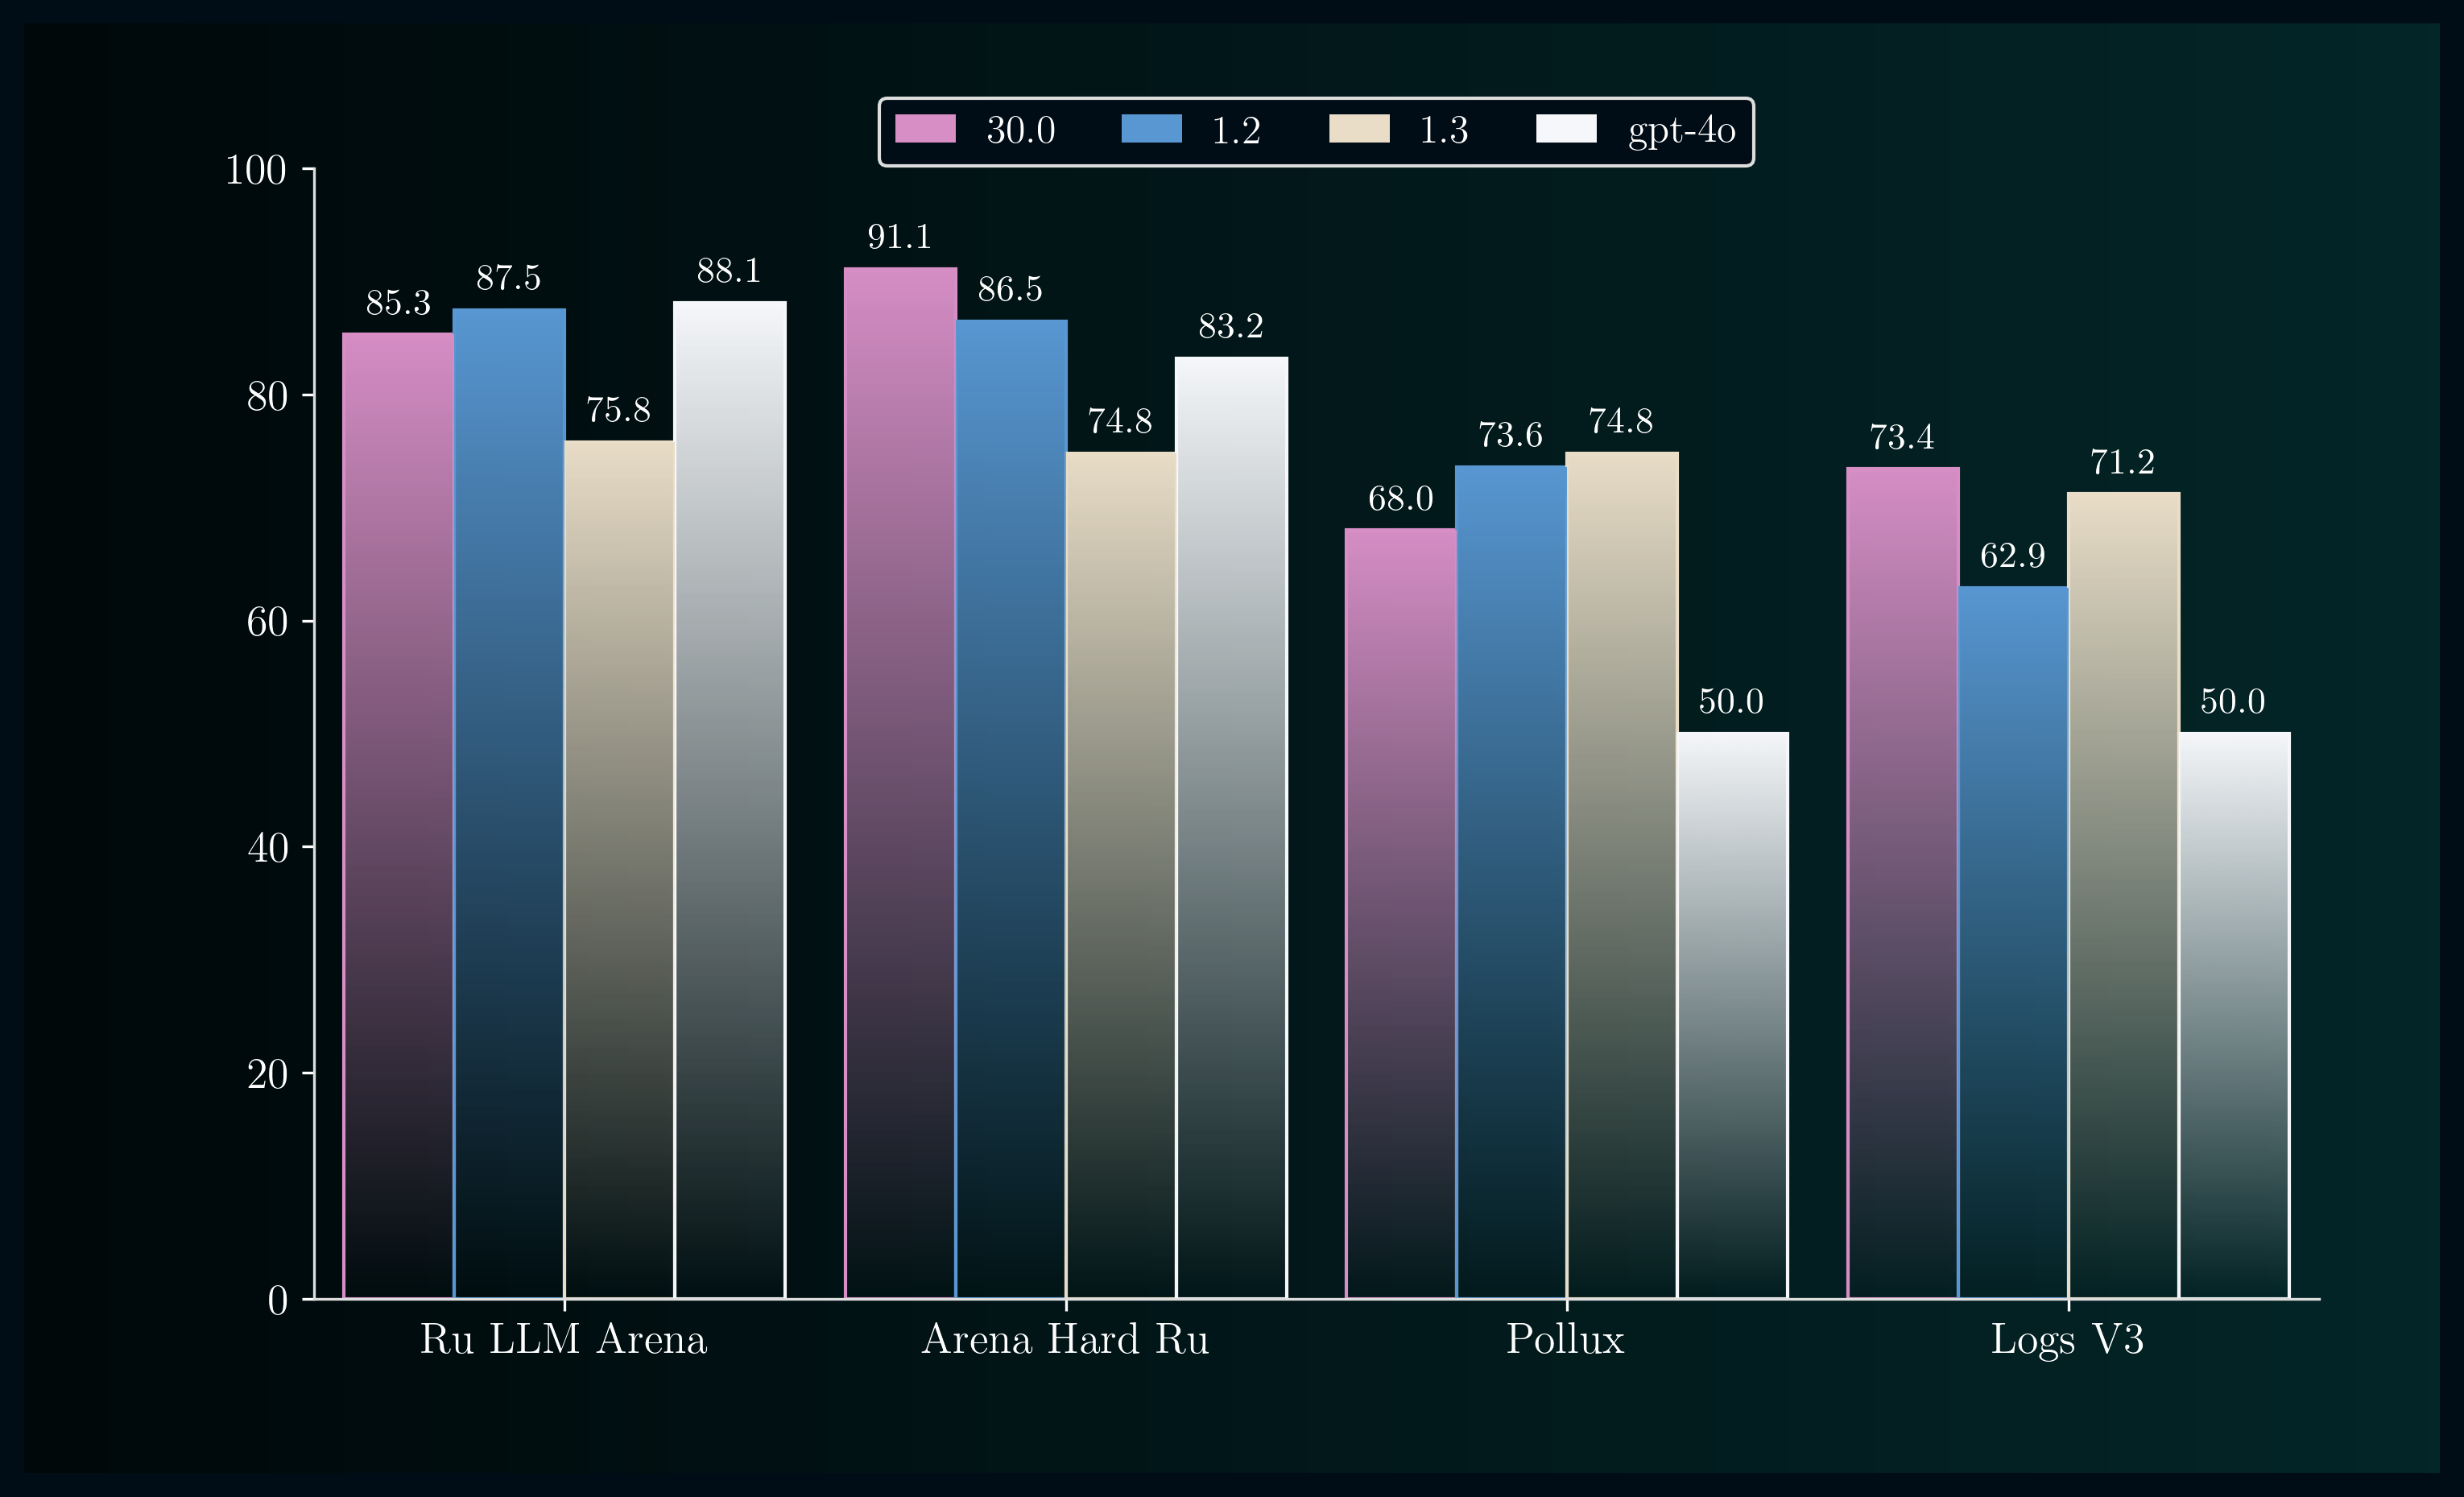

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import pandas as pd
from matplotlib.colors import to_rgba, LinearSegmentedColormap
import matplotlib.colors as mcolors

# -----------------------------
# Данные
# -----------------------------
data = [
    # {"model_tier": "Max",  "version": "28.2", "benchmark": "Ru LLM Arena", "score": 84.3},
    {"model_tier": "Max",  "version": "30.0", "benchmark": "Ru LLM Arena", "score": 85.3},
    # {"model_tier": "Max",  "version": "28.2", "benchmark": "Arena Hard Ru", "score": 87.8},
    {"model_tier": "Max",  "version": "30.0", "benchmark": "Arena Hard Ru", "score": 91.1},
    # {"model_tier": "Max",  "version": "28.2", "benchmark": "Pollux", "score": 54.4},
    {"model_tier": "Max",  "version": "30.0", "benchmark": "Pollux", "score": 68.0},
    # {"model_tier": "Max",  "version": "28.2", "benchmark": "Logs V3", "score": 64.9},
    {"model_tier": "Max",  "version": "30.0", "benchmark": "Logs V3", "score": 73.4},

    {"model_tier": "Max_reasoning",  "version": "1.2", "benchmark": "Arena Hard Ru", "score": 86.5},
    {"model_tier": "Max_reasoning",  "version": "1.3", "benchmark": "Arena Hard Ru", "score": 74.8},
    {"model_tier": "Max_reasoning",  "version": "1.2", "benchmark": "Ru LLM Arena", "score": 87.5},
    {"model_tier": "Max_reasoning",  "version": "1.3", "benchmark": "Ru LLM Arena", "score": 75.8},
    {"model_tier": "Max_reasoning",  "version": "1.2", "benchmark": "Pollux", "score": 73.6},
    {"model_tier": "Max_reasoning",  "version": "1.3", "benchmark": "Pollux", "score": 74.8},
    {"model_tier": "Max_reasoning",  "version": "1.2", "benchmark": "Logs V3", "score": 62.9},
    {"model_tier": "Max_reasoning",  "version": "1.3", "benchmark": "Logs V3", "score": 71.2},
]

data_gpt4o = [
    {"model_tier": "GPT-4o", "version": "gpt-4o", "benchmark": "Ru LLM Arena", "score": 88.1},
    {"model_tier": "GPT-4o", "version": "gpt-4o", "benchmark": "Arena Hard Ru", "score": 83.2},
    {"model_tier": "GPT-4o", "version": "gpt-4o", "benchmark": "Pollux", "score": 50.0},
    {"model_tier": "GPT-4o", "version": "gpt-4o", "benchmark": "Logs V3", "score": 50.0},
]

df = pd.concat([pd.DataFrame(data), pd.DataFrame(data_gpt4o)], ignore_index=True)

# -----------------------------
# Подготовка матрицы
# -----------------------------
categories = df["benchmark"].unique().tolist()
models = df["version"].unique().tolist()

values = np.zeros((len(categories), len(models)))
for i, cat in enumerate(categories):
    for j, mod in enumerate(models):
        row = df[(df["benchmark"] == cat) & (df["version"] == mod)]
        if not row.empty:
            values[i, j] = row["score"].values[0]

# -----------------------------
# Стилизация
# -----------------------------
plt.rcParams.update({
    "axes.edgecolor": "#DDDDDD",
    "axes.axisbelow": True,
    "font.size": 13,
    "xtick.color": 'w',
    "ytick.color": 'w',
    "text.color": 'w',
})

gradients = [
    ("#ffd2c6", "#D68EC5"),
    ("#c9d4ff", "#5897D2"),
    ("#f0ede5", "#E9DDC7"),
    ("#f0ede5", "#f5f7fa"),
    ("#f0ede5", "#f5f7fa"),
]

n_cat = len(categories)
n_models = len(models)

# --- создаём фигуру вручную, чтобы добавить фон ---
fig = plt.figure(figsize=(10, 6), dpi=300)

# Фоновая ось с градиентом
ax_bg = fig.add_axes([0, 0, 1, 1], zorder=0)
ax_bg.axis('off')

nx = 512
grad = np.linspace(0, 1, nx)
grad = np.tile(grad, (64, 1))
cmap = LinearSegmentedColormap.from_list("background", ["#00080a", "#042628"])
ax_bg.imshow(grad, aspect='auto', cmap=cmap, extent=[0, 1, 0, 1], transform=fig.transFigure)

# Основная ось поверх фона
ax = fig.add_subplot(111, facecolor='none', zorder=1)

index = np.arange(n_cat)
bar_width = 0.22
offsets = (np.arange(n_models) - (n_models-1)/2) * bar_width

def gradient_bar(ax, x, height, width, c_bottom, c_top, zorder=2):
    bar = ax.bar(x, height, width, color=(0,0,0,0), edgecolor=c_top, zorder=zorder)
    N = 256
    c1 = np.array(to_rgba(c_bottom))
    c2 = np.array(to_rgba(c_top))
    grad = np.zeros((N, 1, 4))
    for i in range(N):
        t = i/(N-1)
        grad[i, 0, :] = (1-t)*c1 + t*c2
    left = bar[0].get_x()
    right = left + width
    gradient = np.empty((N, 1, 4), dtype=float)
    rgb = mcolors.to_rgb(c_top)
    gradient[:, :, :3] = rgb
    gradient[:, :, 3] = np.linspace(0, 1, 256)[:, None]
    im = ax.imshow(
        gradient, extent=[left, right, 0, height], origin="lower",
        aspect="auto", zorder=zorder+0.1
    )
    im.set_clip_path(bar[0])
    return bar[0]

# Рисуем бары
for m in range(n_models):
    xs = index + offsets[m]
    ys = values[:, m]
    c_bottom, c_top = gradients[m]
    for x, h in zip(xs, ys):
        gradient_bar(ax, x, h, bar_width, c_bottom, c_top, zorder=2.5)
    ax.bar(xs, ys, bar_width, fill=False, edgecolor="None", linewidth=0.8, zorder=3.0)

# Оформление осей
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 20))
ax.set_xlim(-0.5, n_cat-0.5)
ax.set_xticks(index)
ax.set_xticklabels(categories, linespacing=1.2, rotation=0)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Подписи над барами
for m in range(n_models):
    for x, y in zip(index + offsets[m], values[:, m]):
        ax.text(x, y + 1.2, f"{y:.1f}", ha="center", va="bottom", fontsize=11)

# Легенда
legend_handles = [
    mpatches.Patch(facecolor=gradients[m][1], edgecolor="none", label=models[m])
    for m in range(n_models)
]
leg = ax.legend(
    handles=legend_handles,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.08),
    ncol=n_models,
    frameon=True,
    fontsize=12,
    handlelength=1.5,
    columnspacing=1.6,
)
leg.get_frame().set_edgecolor("#DDDDDD")
leg.get_frame().set_linewidth(1.0)
leg.get_frame().set_alpha(1.0)

fig.subplots_adjust(left=0.12, right=0.95, bottom=0.12, top=0.9)

fig.savefig("gradient_bar.png", dpi=300, bbox_inches='tight')
plt.show()

In [1]:
import numpy as np
import sys
import os
sys.path.insert(0, os.path.join(os.path.dirname(os.getcwd()), 'src'))

import eleganplot as eplt

(<matplotlib.lines.Line2D at 0x110d7d550>,
  <matplotlib.lines.Line2D at 0x110db0580>])

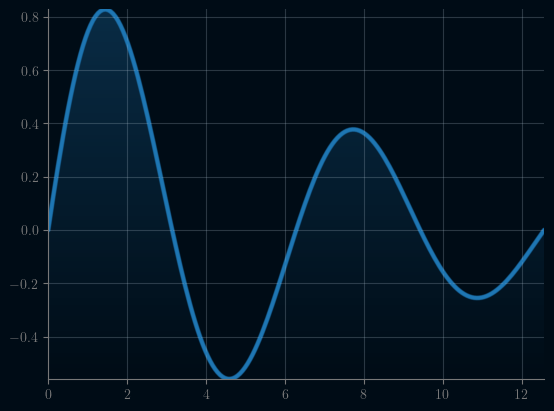

In [2]:
# import eleganplot as eplt
import numpy as np

fig, ax = eplt.subplots()
x = np.linspace(0, 4*np.pi, 200)
y = np.sin(x) * np.exp(-x/8)

# 1. Сначала gradient_plot для заливки
line, _ = ax.gradient_plot(x, y,  alpha_coef=0.3, linewidth=1)

# 2. Затем glow_line для свечения
ax.glow_line(x, y, line, glow_width=3.0, glow_alpha=0.8)




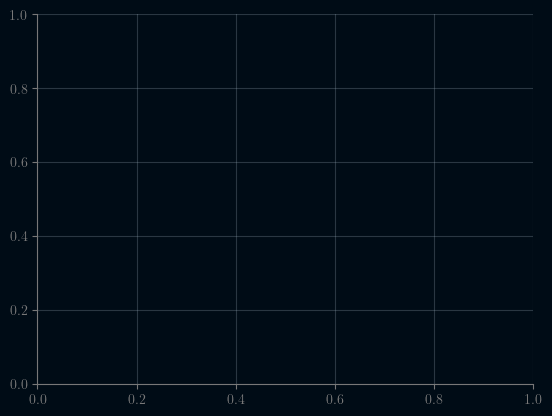

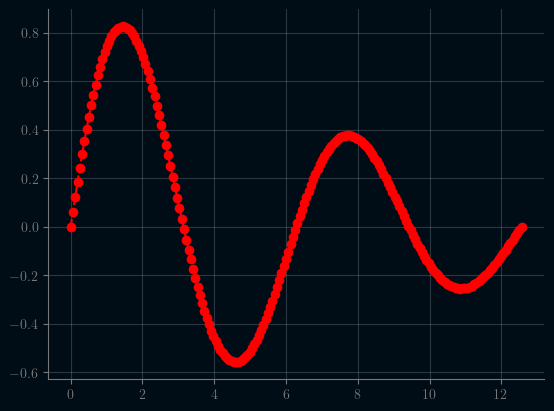

In [4]:
from eleganplot import custom_axes_method
from eleganplot.utils.decorators import apply_custom_methods

@custom_axes_method("my_plot")
def my_custom_plot(ax, x, y, style='fancy', **kwargs):
    """Мой кастомный метод построения графиков."""
    if style == 'fancy':
        # Ваша логика здесь
        return ax._ax.plot(x, y, marker='o', linestyle='--', **kwargs)
    else:
        return ax._ax.plot(x, y, **kwargs)

# Применяем к классу EleganAxes
apply_custom_methods(eplt.axes().__class__)

# Теперь можно использовать
fig, ax = eplt.subplots()
ax.my_plot(x, y, style='fancy', color='red')